In [1]:
###
##   Business Understanding
##
# 
from IPython.core.display import display, HTML
from IPython.display import IFrame
display(HTML('''<h1>


Chicago is one of the largest cities in United States.It is the third most populous city in the United states 
with 2.7 Million people. The city is about 228 square miles and the urban area is around 2000 square miles. 
Chicago’s weather conditions vary from cold days of snow to hot 100 degrees summers. The roadways supporting 
the populations is busy throughout the year.The city government works to better the public safety on the roads. 
On the roadways of Chicago, there are numerous accidents every year. Chicago police department collects detailed 
data about every vehicle crash incident. They want to use this data to find ways to avoid serious crashes involving injury and fatality.

Source of the data is at link 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if


</h1>'''))


In [5]:
import pandas as pd
from  pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import datasets
from ipywidgets import widgets
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
path = "../../data/TrafficCrashesChicago.csv"
pd.options.display.max_columns=60

categoricals = ['CRASH_DATE_EST_I', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
                'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
                'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
                'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'PHOTOS_TAKEN_I',
                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'MOST_SEVERE_INJURY', 'BEAT_OF_OCCURRENCE']
dtypes = dict.fromkeys(categoricals, 'category')

df = pd.read_csv(path, parse_dates = ['CRASH_DATE', 'DATE_POLICE_NOTIFIED'], dtype=dtypes)
#print(df['CRASH_DATE'].head())


In [4]:
# Create a seperate month and year column from the CRASH_DATE column
#
month_of_year = list()
year_of_crash = list()
for e in df['CRASH_DATE']:
     month_of_year.append(pd.Timestamp(e).month)
     year_of_crash.append(pd.Timestamp(e).year) 

frames = [df, df_new.astype(int)]
df = pd.concat(frames, axis=1)



KeyboardInterrupt: 

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377630 entries, 0 to 377629
Data columns (total 50 columns):
RD_NO                            377630 non-null object
CRASH_DATE_EST_I                 28062 non-null object
CRASH_DATE                       377630 non-null object
POSTED_SPEED_LIMIT               377630 non-null int64
TRAFFIC_CONTROL_DEVICE           377630 non-null object
DEVICE_CONDITION                 377630 non-null object
WEATHER_CONDITION                377630 non-null object
LIGHTING_CONDITION               377630 non-null object
FIRST_CRASH_TYPE                 377630 non-null object
TRAFFICWAY_TYPE                  377630 non-null object
LANE_CNT                         198549 non-null float64
ALIGNMENT                        377630 non-null object
ROADWAY_SURFACE_COND             377630 non-null object
ROAD_DEFECT                      377630 non-null object
REPORT_TYPE                      368884 non-null object
CRASH_TYPE                       377630 non-null o

In [6]:
df.ROADWAY_SURFACE_COND.isnull().sum()

0

In [7]:
df.REPORT_TYPE.va

AttributeError: 'Series' object has no attribute 'va'

In [8]:
df_new = pd.DataFrame.copy(df)

df_new.replace({'CRASH_TYPE': r'NO INJURY.*$'}, {'CRASH_TYPE': 'NO_INJURY'}, regex=True, inplace=True)
df_new.replace({'CRASH_TYPE': r'INJURY AND.*$'}, {'CRASH_TYPE': 'INJURY'}, regex=True, inplace=True)


df_bytime1 = pd.crosstab(df_new['CRASH_TYPE'],[df_new['YEAR'],df_new['MONTH']])

print(df_bytime1)
# Plot of 2016 data is very different from 2017 , 2018 and 2019
# so for our analysis , we are considering only 2017 and above 

plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(3,2, frameon=True, sharex=False, constrained_layout=True)


df_view = df_bytime1.xs('INJURY').xs(2015)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2015', fontsize=20)
a[0,0].title.set_size(30)

df_view = df_bytime1.xs('INJURY').xs(2016)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,1], sharey=True, title='INJURY 2016', fontsize=20)
a[0,1].title.set_size(30)



KeyError: 'YEAR'

In [161]:
# Taking only data of year 2017 and after since the previous years have very varied distributions for which
# the reasons needs to be explored.
# For now, we can assume that the data was collected at limited areas may be because they were running a pilot project.

df = df[df['YEAR']>=2017]
df

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,MONTH,YEAR
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/04/2019 11:05:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),7,2019
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/30/2019 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),7,2019
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",08/10/2019 05:35:00 PM,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),8,2019
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/16/2019 04:53:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),8,2019
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/17/2019 06:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),8,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377625,JC378354,Y,08/04/2019 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,NaN,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/04/2019 04:27:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,4520,S,PULASKI RD,815.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,15,1,8,41.810875,-87.723844,POINT (-87.723844436723 41.810874802632),8,2019
377626,JC406679,NaN,08/25/2019 01:07:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",08/25/2019 01:08:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5958,W,LAWRENCE AVE,1622.0,NaN,NaN,NaN,NaN,NaN

In [ ]:
##
##  Describe the meaning and type of data and its scale 
##

'''
The description of data is generated by Pandas profile.
The data consists of 47 features and 377630 rows.
There are 23 categorical variables, 15 numberical and 10 boolean variables.

A brief description of variable is as below. More can be found on the source page 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

RD_NO = Is a unique ID for each crash . This ID can also be used to refer to vehicle database and people database.
        The type of data is TEXT.

CRASH_DATE_EST_I = Crash date estimated by desk officer or reporting party. The type of data is TEXT.

CRASH_DATE = Date and time of crash as entered by the reporting officer. The type of data is Floating time stamp.

POSTED_SPEED_LIMIT = Posted speed limit, as determined by reporting officer. The data is numberical.

TRAFFIC_CONTROL_DEVICE = Traffic control device present at crash location, as determined by reporting officer
DEVICE_CONDITION = Condition of traffic control device, as determined by reporting officer
WEATHER_CONDITION = Weather condition at time of crash, as determined by reporting officer
LIGHTING_CONDITION = Light condition at time of crash, as determined by reporting officer
FIRST_CRASH_TYPE = Type of first collision in crash
TRAFFICWAY_TYPE = Trafficway type, as determined by reporting officer
LANE_CNT = Total number of through lanes in either direction, excluding turn lanes, as determined by reporting officer (0 = intersection)
ALIGNMENT = Street alignment at crash location, as determined by reporting officer
ROADWAY_SURFACE_COND = Road surface condition, as determined by reporting officer
ROAD_DEFECT = Road defects, as determined by reporting officer
REPORT_TYPE = Administrative report type (at scene, at desk, amended)
CRASH_TYPE = A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away
INTERSECTION_RELATED_I = A field observation by the police officer whether an intersection played a role in the crash. 
                        Does not represent whether or not the crash occurred within the intersection.
                        
NOT_RIGHT_OF_WAY_I = Whether the crash begun or first contact was made outside of the public right-of-way.
HIT_AND_RUN_I = Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid
DAMAGE = A field observation of estimated damage.
DATE_POLICE_NOTIFIED = Calendar date on which police were notified of the crash
PRIM_CONTRIBUTORY_CAUSE = The factor which was most significant in causing the crash, as determined by officer judgment
SEC_CONTRIBUTORY_CAUSE = The factor which was second most significant in causing the crash, as determined by officer judgment
STREET_NO = Street address number of crash location, as determined by reporting officer
STREET_DIRECTION = Street address direction (N,E,S,W) of crash location, as determined by reporting officer
STREET_NAME = Street address name of crash location, as determined by reporting officer
BEAT_OF_OCCURRENCE = Chicago Police Department Beat ID. Boundaries available at https://data.cityofchicago.org/d/aerh-rz74
PHOTOS_TAKEN_I = Whether the Chicago Police Department took photos at the location of the crash
STATEMENTS_TAKEN_I = Whether statements were taken from unit(s) involved in crash
DOORING_I = Whether crash involved a motor vehicle occupant opening a door into the travel path of a bicyclist, causing a crash
WORK_ZONE_I = Whether the crash occurred in an active work zone
WORK_ZONE_TYPE = The type of work zone, if any
WORKERS_PRESENT_I = Whether construction workers were present in an active work zone at crash location
NUM_UNITS = Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or 
            another non-passenger roadway user.Each unit represents a mode of traffic with an independent trajectory.

MOST_SEVERE_INJURY = Most severe injury sustained by any person involved in the crash
INJURIES_TOTAL = Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries as 
                determined by the reporting officer

INJURIES_FATAL = Total persons sustaining fatal injuries in the crash
INJURIES_INCAPACITATING = Total persons sustaining incapacitating/serious injuries in the crash as determined 
                    by the reporting officer. Any injury other than fatal injury, which prevents the injured person from walking, 
                    driving, or normally continuing the activities they were capable of performing before the injury occurred. 
                    Includes severe lacerations, broken limbs, skull or chest injuries, and abdominal injuries.



'''

In [ ]:
'''
 # Missing data and the way to deal with the missing data
 
 CRASH_DATE_EST_I is a TEXT field and it has 92.6% missing values. This field is recorded at the office instead of the crash site.
 This normally happens when it is a minor crash which does not gets immediately reported.
 This also happens when the officer was not called onsite.
 The missing data in this field can be substituted from CRASH_DATE field which has 0% missing data.
 
 POSTED_SPEED_LIMIT has 1.7% of data which is zero. Even though there are speed limits posted every where on streets, 
 there can be parking lots where speed is not posted. We can infer from the feature TRAFFICWAY_TYPE if the location is 
 parking lot or not. If it is parking lot, we can change the POSTED_SPEED to 5 mph. If the location is not parking lot , we can 
 derive the speed limit from suplimentary data about roads information by using the latitude and longitude values from this data set.
 If there are still some values of POSTED_SPEED_LIMIT which are zero, we can delete those rows.
 Also , there are errors in this field which has values like 1 mph , 2 mph as speed limits. We need to use suplimentray data to from 
 roads department data to fix these values. We can bin the values into 3 bins. Bin1 is 0-30 , Bin2 is 30-60 and Bin3 is 60-90.
 
 TRAFFIC_CONTROL_DEVICE and DEVICE_CONTROL has unknown type. We can consider this as error in entry and change it category 'NO CONTROLS' at all.
 
 WEATHER_CONDITION has unknown type. We can get the weather data corresponding to those days and change these values accordingly.
 
 LIGHTING_CONDITION has unknown type . We can change this unknown to , other known types based on time of the day and weather report data.
 
 LANE_CNT has 47% missing data and zeros. We can fix these entries by looking at road and transport department data.
 
 
 INJURIES_INCAPACITATING has zeros. We can consider this as categorical values with a scale 0 to 4. 
 Zero meaning, the INJURIES with least level of INCAPACITATING and 4 is more towards fatal.
 
 INJURIES_NON_INCAPACITATING has zeros. We can consider this as part of the scale from 0 to 4.
 
 HIT_AND_RUN_I has 72% missing. We can consider this field true if the crash report was done at office.
 
 
 
 REPORT_TYPE has 2.3% missing. This field can be derived from CRASH_DATE_EST_I or CRASH_DATE fields.
 
 CRASH_HOUR has 1.7% zeros. If the corresponding LIGHTING condition is available, we can adjust the CRASH_HOUR to fall in 
  average of day time or average of night time 
 
 '''

In [ ]:

# Uncomment below lines to run pandas profiling

#profile = ProfileReport(df, minimal=True)
#profile

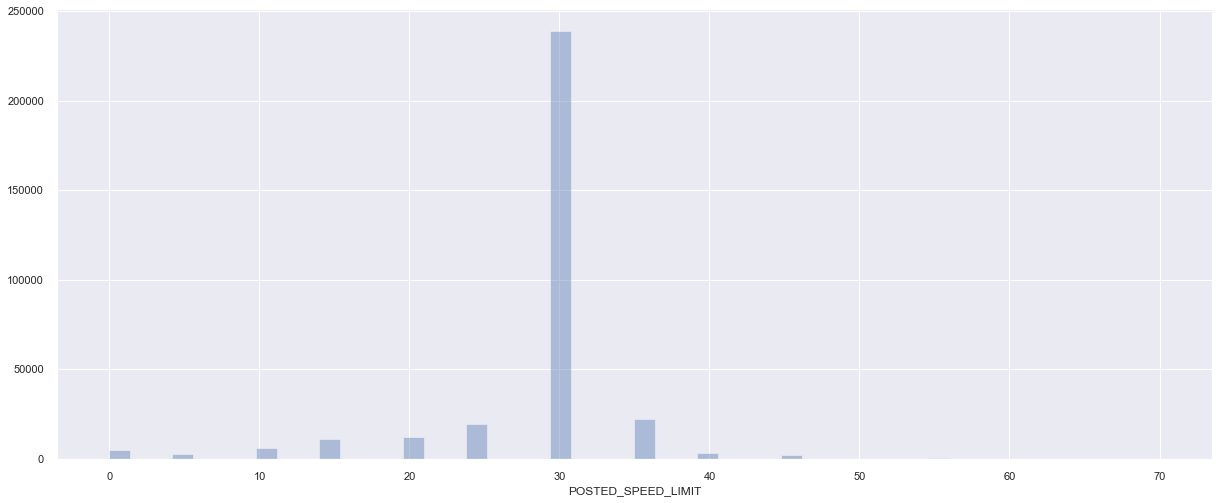

In [89]:
#profile.to_file("crash_data_report.html")
sns.set()
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.distplot(df.POSTED_SPEED_LIMIT,kde=False)

# The histogram below is left skewed

In [162]:
# Lets select few important features and use them to explore the data
# 
df_all5 = df.loc[:,['POSTED_SPEED_LIMIT','ROAD_DEFECT','WEATHER_CONDITION',
                    'LIGHTING_CONDITION','CRASH_TYPE','CRASH_DAY_OF_WEEK', 'REPORT_TYPE',
                    'NUM_UNITS', 'DEVICE_CONDITION','MONTH','YEAR','DAMAGE','STREET_DIRECTION','BEAT_OF_OCCURRENCE']]

# Rename these columns to shorter names for better readibility of visuals
#
df_all_copy = pd.DataFrame.copy(df_all5)
df_all_copy.rename(columns={'POSTED_SPEED_LIMIT':'SP_LIM',
                            'ROAD_DEFECT':'ROAD', 
                            'LIGHTING_CONDITION':'LIGHT',
                            'WEATHER_CONDITION':'WEATHER',
                            'CRASH_DAY_OF_WEEK':'WEEKDAY',
                            'CRASH_TYPE':'CRASH',
                            'DEVICE_CONDITION':'DEVICE'}, inplace=True)

# Lets categorize the CRASH_TYPE to 2 levels. INJURY or NO_INJURY.
# All injury types are counted under INJURY

df_all_copy.replace(to_replace=r'NO INJURY.*$', value='NO_INJURY', regex=True, inplace=True)
df_all_copy.replace(to_replace=r'INJURY AND.*$', value='INJURY', regex=True, inplace=True)
#df_all_copy.replace(to_replace=r'INJURY AND.*$', value='INJURY', regex=True, inplace=True)

# Lets categorize lighting condition into 3 types. Day light, lighted streets and poorly light streets.
df_all_copy.replace(to_replace=r'DARKNESS, LIGHTED.*$', value='LIGHTED', regex=True, inplace=True)
df_all_copy.replace({'LIGHT': r'^(UNKNOWN|DUSK|DAWN).*$'}, {'LIGHT': 'POOR_LIGHT'}, regex=True, inplace=True)


# Weather condition into 2 categories. Clear or not clear
df_all_copy.replace({'WEATHER': r'^(?!CLEAR).*$'}, {'WEATHER': 'NO_CLEAR'}, regex=True, inplace=True)

# Road condition as defective or not defective 
df_all_copy.replace({'ROAD': r'^(?!NO DEFECTS).*$'}, {'ROAD': 'DEFECTIVE'}, regex=True, inplace=True)
df_all_copy.replace({'ROAD': r'^NO DEFECTS.*$'}, {'ROAD': 'NO_DEFECT'}, regex=True, inplace=True)

# Divide device condition into 3 categories
# No controls, working controls, defective controls
#df_all_copy.replace({'DEVICE_CONDITION': r'^(NO CONTROLS).*$'}, {'DEVICE_CONDITION': 'NO'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(?!(NO CONTROLS)|(FUNCTIONING PROPERLY)).*$'},
                    {'DEVICE': 'DEFECTIVE'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(NO CONTROLS).*$'}, {'DEVICE': 'NO'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(FUNCTIONING PROPERLY).*$'}, {'DEVICE': 'WORKING'}, regex=True, inplace=True)
df_all_copy.replace({'LIGHT': r'^(UNKNOWN|DUSK|DAWN).*$'}, {'LIGHT': 'POOR_LIGHT'}, regex=True, inplace=True)



In [ ]:
df_all_copy.loc[:,'DEVICE'].unique()

In [163]:

# Convert speed limit to integer
df_all_copy['SP_LIM'] = df_all_copy['SP_LIM'].astype(int)

# Bin the speeds to 3 levels, Low , medium and high
df_all_copy['BINNED_SPEED'] = pd.cut((df_all_copy['SP_LIM']), 3, labels=['L','M','H'])

# For crash type ( injury or no) get the count of accidents based on speed limit and road condition
df_crosstab1 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy['BINNED_SPEED'], df_all_copy['ROAD']])

# For crash type , get the count of accidents based on speed limit and weather condition
df_crosstab2 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy.BINNED_SPEED, df_all_copy.WEATHER])

# For crash type, get the count of accidents based on speed limit and lighting condition
df_crosstab3 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy.BINNED_SPEED, df_all_copy.LIGHT])

# For each speed type , get the count of accidents with weather and lighting conditions
df_crosstab4 = pd.crosstab(df_all_copy['BINNED_SPEED'], [df_all_copy.WEATHER, df_all_copy.LIGHT])

# For each crash type, get count of accidents with lighting, road condition, speed limit and traffic control device
df_crosstab5 = pd.crosstab(df_all_copy['CRASH'],[df_all_copy['LIGHT'], df_all_copy['ROAD'], df_all_copy['BINNED_SPEED'], df_all_copy['DEVICE']] )

# For each crash typ e, get count of accidents for a particular year and month of that year
df_bytime = pd.crosstab(df_all_copy['CRASH'],[df_all_copy['YEAR'],df_all_copy['MONTH']])
#print(df_bytime)



In [ ]:
by_month = pd.DataFrame( df_bytime.xs('INJURY').loc[[2017,2018,2019],1] )
#by_month.index
#plt.boxplot(by_month)
#by_month1 = df_bytime.xs('INJURY').loc[[2017,2018,2019],2]
#by_month1
#plt.boxplot(by_month1, labels=[2])

In [ ]:

plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(2,2, frameon=True, sharex=False, constrained_layout=True)

df_view = df_crosstab1.unstack().sort_values(ascending=False)
df_view.plot(kind='bar', ax=a[0,0], fontsize=15, title='Accident count based of Speed, Road defect and Injury Type')
a[0,0].title.set_size(30)

df_view = df_crosstab2
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[0,1], fontsize=15, title='Speed, Weather and Injury Type ')
a[0,1].title.set_size(30)

df_view = df_crosstab3
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,0], fontsize=15, title='Speed, Lighting and Injury Type ' )
a[1,0].title.set_size(30)

df_view = df_crosstab4
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,1], fontsize=15, title='Speed, Lighting and Weather ')
a[1,1].title.set_size(30)




In [ ]:
plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(3,2, frameon=True, sharex=False, constrained_layout=True)


# Plot of 2016 data is very different from 2017 , 2018 and 2019
# so for our analysis , we are considering only 2017 and above 
df_view = df_bytime.xs('INJURY').xs(2016)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2016', fontsize=20)
a[0,0].title.set_size(30)



df_view = df_bytime.xs('INJURY').xs(2017)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2017', fontsize=20)
a[0,0].title.set_size(30)

df_view = df_bytime.xs('NO_INJURY').xs(2017)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,1], sharey=True, title='NO_INJURY 2017', fontsize=20)
a[0,1].title.set_size(30)

df_view = df_bytime.xs('INJURY').xs(2018)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[1,0], sharey=True, title='INJURY 2018', fontsize=20)
a[1,0].title.set_size(30)

df_view = df_bytime.xs('NO_INJURY').xs(2018)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[1,1], sharey=True, title='NO_INJURY 2018', fontsize=20)
a[1,1].title.set_size(30)

df_view = df_bytime.xs('INJURY').xs(2019)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[2,0], sharey=True, title='INJURY 2019', fontsize=20)
a[2,0].title.set_size(30)

df_view = df_bytime.xs('NO_INJURY').xs(2019)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[2,1], sharey=True, title='NO_INJURY 2019', fontsize=20)
a[2,1].title.set_size(30)





In [ ]:
plt.rcParams["figure.figsize"] = (40,60)
df_view = df_crosstab5
df_view.unstack().sort_values(ascending=False).plot(kind='bar', fontsize=15)

In [ ]:
print(df_all_copy.columns)
frames = [df_all_copy,pd.get_dummies(df_all_copy, columns=['CRASH','ROAD','DEVICE','LIGHT','WEATHER','BINNED_SPEED']), ]
df_all_copy1 = pd.concat(frames, axis=1)
print((df_all_copy1.columns))

y = (df_all_copy1['CRASH_INJURY']).as_matrix()
X = df_all_copy1.drop(columns=['CRASH','CRASH_NO_INJURY',
                              'DEVICE','DEVICE_NO','WEATHER_CLEAR','WEATHER',
                              'ROAD','ROAD_NO_DEFECT','SP_LIM','LIGHT', 
                               'NUM_UNITS','DEVICE_WORKING','BINNED_SPEED'])
print((X.columns))

from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop('CRASH_INJURY',axis=1), 
                                                    X['CRASH_INJURY'], test_size=0.30, 
                                                    random_state=101)


print(type(X_test.values))
clf = logreg(random_state=0).fit(X_train.values, y_train.values)

predictions = clf.predict(X_test.values)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))



In [241]:
clf.coef_
X_train.features()

NameError: name 'clf' is not defined

# sangrae begins here
- adding more variables due to lower f-1 score when INJURY
- adding variables : *'REPORT_TYPE', 'DAMAGE','STREET_DIRECTION','BEAT_OF_OCCURRENCE'*

 ```df_all5 = df.loc[:,['POSTED_SPEED_LIMIT','ROAD_DEFECT','WEATHER_CONDITION',
                    'LIGHTING_CONDITION','CRASH_TYPE','CRASH_DAY_OF_WEEK', 'REPORT_TYPE',
                    'NUM_UNITS', 'DEVICE_CONDITION','MONTH','YEAR','DAMAGE','STREET_DIRECTION','BEAT_OF_OCCURRENCE']] ```

In [168]:
df_all_copy.info()

# num_units has missing values, will drop the nas


<class 'pandas.core.frame.DataFrame'>
Int64Index: 323462 entries, 0 to 377629
Data columns (total 15 columns):
SP_LIM                323462 non-null int32
ROAD                  323462 non-null object
WEATHER               323462 non-null object
LIGHT                 323462 non-null object
CRASH                 323462 non-null object
WEEKDAY               323462 non-null int64
REPORT_TYPE           315249 non-null object
NUM_UNITS             322005 non-null float64
DEVICE                323462 non-null object
MONTH                 323462 non-null int64
YEAR                  323462 non-null int64
DAMAGE                323462 non-null object
STREET_DIRECTION      323461 non-null object
BEAT_OF_OCCURRENCE    323462 non-null float64
BINNED_SPEED          323462 non-null category
dtypes: category(1), float64(2), int32(1), int64(3), object(8)
memory usage: 36.1+ MB


In [169]:
# will use df_s (sangrae)
df_s = df_all_copy.copy()

# num_units has missing values, will drop the nas
df_s = df_s.dropna(subset=['NUM_UNITS'], how='any', axis=0)
#Street_direction has one missing value, 
df_s = df_s.dropna(subset=['STREET_DIRECTION'], how= 'any', axis = 0)
#report_type has nan -> 'no report'
df_s['REPORT_TYPE'].fillna('no_report',inplace=True)
#beat of occurence has 3 missing values -> median
df_s['BEAT_OF_OCCURRENCE'].fillna(df_s.BEAT_OF_OCCURRENCE.median(),inplace=True)

In [170]:
# lower case for easy typing
df_s.columns = [x.lower() for x in df_s.columns]

# Weekday and month and year -> categorical variables
df_s.weekday=df_s.weekday.astype('object')
df_s.month=df_s.month.astype('object')
df_s.year=df_s.year.astype('object')

#getting obj only
obj_df_s = df_s.select_dtypes(include = ['object'])

#review obj_df_s
for i in obj_df_s.columns:
    print('***** Object name: ', obj_df_s[i].name, ': % *****')
    print(obj_df_s[i].value_counts(normalize = True, dropna = False) *100, '\n')

***** Object name:  road : % *****
NO_DEFECT    83.913864
DEFECTIVE    16.086136
Name: road, dtype: float64 

***** Object name:  weather : % *****
CLEAR       78.964547
NO_CLEAR    21.035453
Name: weather, dtype: float64 

***** Object name:  light : % *****
DAYLIGHT      65.502913
LIGHTED       21.267127
POOR_LIGHT     8.183749
DARKNESS       5.046211
Name: light, dtype: float64 

***** Object name:  crash : % *****
NO_INJURY    74.902486
INJURY       25.097514
Name: crash, dtype: float64 

***** Object name:  weekday : % *****
6    16.057875
7    14.585223
3    14.579322
5    14.491124
4    14.240196
2    14.026534
1    12.019726
Name: weekday, dtype: float64 

***** Object name:  report_type : % *****
NOT ON SCENE (DESK REPORT)    55.968870
ON SCENE                      41.669358
no_report                      2.361772
Name: report_type, dtype: float64 

***** Object name:  device : % *****
NO           58.039962
WORKING      34.999876
DEFECTIVE     6.960162
Name: device, dtype: fl

In [171]:
df_s.isnull().sum()

sp_lim                0
road                  0
weather               0
light                 0
crash                 0
weekday               0
report_type           0
num_units             0
device                0
month                 0
year                  0
damage                0
street_direction      0
beat_of_occurrence    0
binned_speed          0
dtype: int64

In [172]:
# convert each categorical feature using one-hot encoding

obj_df = df_s.select_dtypes(include = ['object']).drop('crash',axis=1)
int_df = df_s.select_dtypes(include = ['int32','float64'])

# onehot encoding
onehot_obj = pd.get_dummies(obj_df, drop_first=True) # dummy trap(one variable can be induced)
print(onehot_obj.columns)

# concat
design_df = pd.concat([onehot_obj,int_df], axis=1)

# feature selecting
X = design_df
y = df_s['crash']


Index(['road_NO_DEFECT', 'weather_NO_CLEAR', 'light_DAYLIGHT', 'light_LIGHTED',
       'light_POOR_LIGHT', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7', 'report_type_ON SCENE',
       'report_type_no_report', 'device_NO', 'device_WORKING', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2018', 'year_2019',
       'year_2020', 'damage_$501 - $1,500', 'damage_OVER $1,500',
       'street_direction_N', 'street_direction_S', 'street_direction_W'],
      dtype='object')


In [173]:
# normalization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)


In [174]:
# train vs test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data count: ', X_train.shape)
print('test data count: ', X_test.shape)

train data count:  (225402, 37)
test data count:  (96602, 37)


In [175]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

print('train_score: ', logit_model.score(X_train, y_train))
print('Test_score: ', logit_model.score(X_test, y_test))

y_hat = logit_model.predict(X_test) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

# report
logit_report = mt.classification_report(y_test, y_hat)            
print(logit_report)

train_score:  0.8121134683809371
Test_score:  0.8107906668598994
accuracy 0.8107906668598994
confusion matrix
 [[14776  9755]
 [ 8523 63548]]
              precision    recall  f1-score   support

      INJURY       0.63      0.60      0.62     24531
   NO_INJURY       0.87      0.88      0.87     72071

    accuracy                           0.81     96602
   macro avg       0.75      0.74      0.75     96602
weighted avg       0.81      0.81      0.81     96602



In [176]:
# iterate over the coefficients
weights = logit_model.coef_.T # take transpose to make a column vector
variable_names = design_df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

road_NO_DEFECT has weight of 0.012495997162712455
weather_NO_CLEAR has weight of -0.012628856733424785
light_DAYLIGHT has weight of 0.09296294931441172
light_LIGHTED has weight of -0.08622397250654806
light_POOR_LIGHT has weight of 0.05632571428339961
weekday_2 has weight of 0.039728356223072754
weekday_3 has weight of 0.043160886587834055
weekday_4 has weight of 0.038716905923160384
weekday_5 has weight of 0.03758152999166635
weekday_6 has weight of 0.041396497140198045
weekday_7 has weight of 0.017315297538465294
report_type_ON SCENE has weight of -1.262193333523634
report_type_no_report has weight of -0.30220256488141684
device_NO has weight of 0.1347663659982035
device_WORKING has weight of -0.07597158197090291
month_2 has weight of 0.016170785766126555
month_3 has weight of 0.014768371196228956
month_4 has weight of -0.008354732704765838
month_5 has weight of -0.018068846059927472
month_6 has weight of -0.013271957885530308
month_7 has weight of -0.020814653290939244
month_8 has w

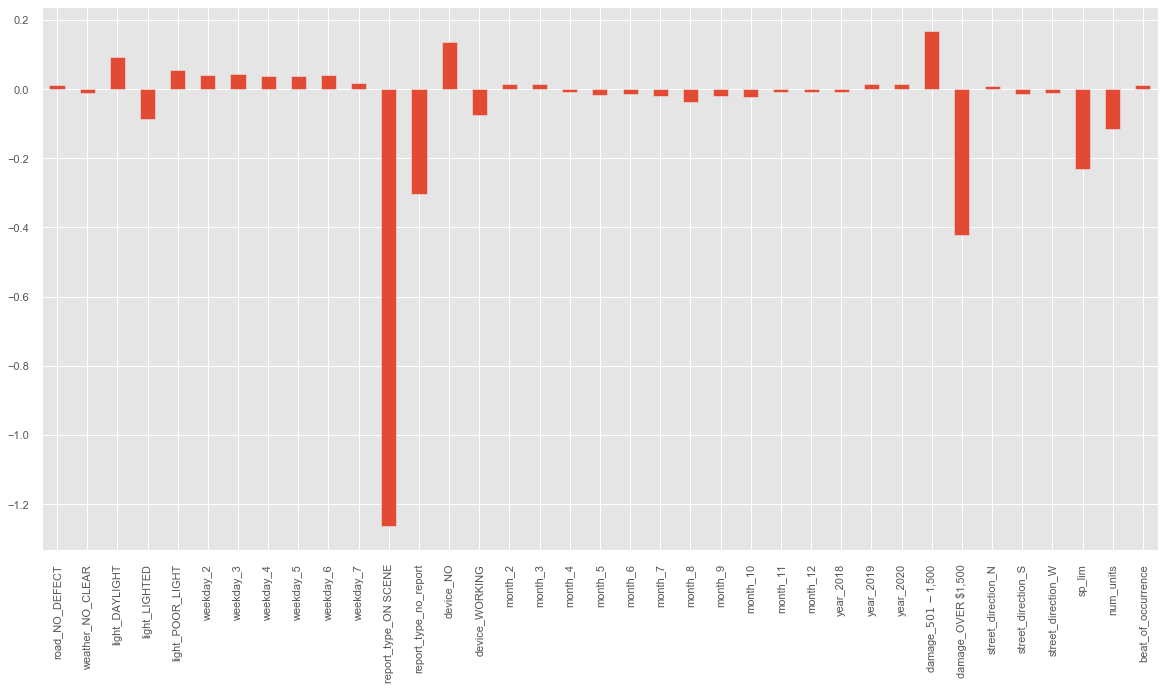

In [177]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize = (20,10))
weights = pd.Series(logit_model.coef_[0],index=design_df.columns)
weights.plot(kind='bar')
plt.show()

In [187]:
# interpretation of report_type_ON SCENE has weight of -1.262193333523634

from math import exp, expm1
print('Liklihood of NO_INJURY when report type is ON SCENE is ', round((exp(-1.26)-1)*100,2)*-1,'% less than when report type is OFFICE.')
print('When num_unit is increased by 1 unit, likelihood of NO_INJURY is decrased by', round((exp(-0.114)-1)*100,2)*-1,'%')


Liklihood of NO_INJURY when report type is ON SCENE is  71.63 % less than when report type is OFFICE.
When num_unit is increased by 1 unit, likelihood of NO_INJURY is decrased by 10.77 %


## SVM

In [188]:
from sklearn import svm


svm_model = svm.SVC(kernel='rbf')

# fitting
svm_model.fit(X_train, y_train)   

#predict
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

['NO_INJURY' 'INJURY' 'INJURY' 'NO_INJURY' 'NO_INJURY' 'NO_INJURY'
 'NO_INJURY' 'INJURY' 'NO_INJURY' 'NO_INJURY']
['NO_INJURY' 'INJURY' 'NO_INJURY' 'NO_INJURY' 'NO_INJURY' 'NO_INJURY'
 'NO_INJURY' 'INJURY' 'INJURY' 'NO_INJURY']




In [191]:
# performance
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')


# print('train_score: ', svm_model.score(X_train, y_train))
# print('Test_score: ', svm_model.score(X_test, y_test))

svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[[15800  8731]
 [ 9237 62834]]


              precision    recall  f1-score   support

      INJURY       0.63      0.64      0.64     24531
   NO_INJURY       0.88      0.87      0.87     72071

    accuracy                           0.81     96602
   macro avg       0.75      0.76      0.76     96602
weighted avg       0.82      0.81      0.81     96602



In [204]:
# feature changing, since some of features are not significant, i will drop:
# weekdays, month, year

# feature selecting
X_1 = design_df.loc[:,['road_NO_DEFECT', 'weather_NO_CLEAR', 'light_DAYLIGHT', 'light_LIGHTED',
       'light_POOR_LIGHT', 'report_type_ON SCENE', 'report_type_no_report', 'device_NO', 'device_WORKING', 
        'damage_$501 - $1,500', 'damage_OVER $1,500','street_direction_N', 'street_direction_S', 'street_direction_W']]
y_1 = df_s['crash']

# normalization
from sklearn import preprocessing
X_1 = preprocessing.StandardScaler().fit(X_1).transform(X_1)

# train vs test
from sklearn.model_selection import train_test_split
X_1train, X_1test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=10) 

print('test data count: ', X_1test.shape)

test data count:  (96602, 14)


train_score:  0.8062617013158712
Test_score:  0.8046520775967372
accuracy 0.8046520775967372
confusion matrix
 [[14873  9658]
 [ 9213 62858]]
              precision    recall  f1-score   support

      INJURY       0.62      0.61      0.61     24531
   NO_INJURY       0.87      0.87      0.87     72071

    accuracy                           0.80     96602
   macro avg       0.74      0.74      0.74     96602
weighted avg       0.80      0.80      0.80     96602



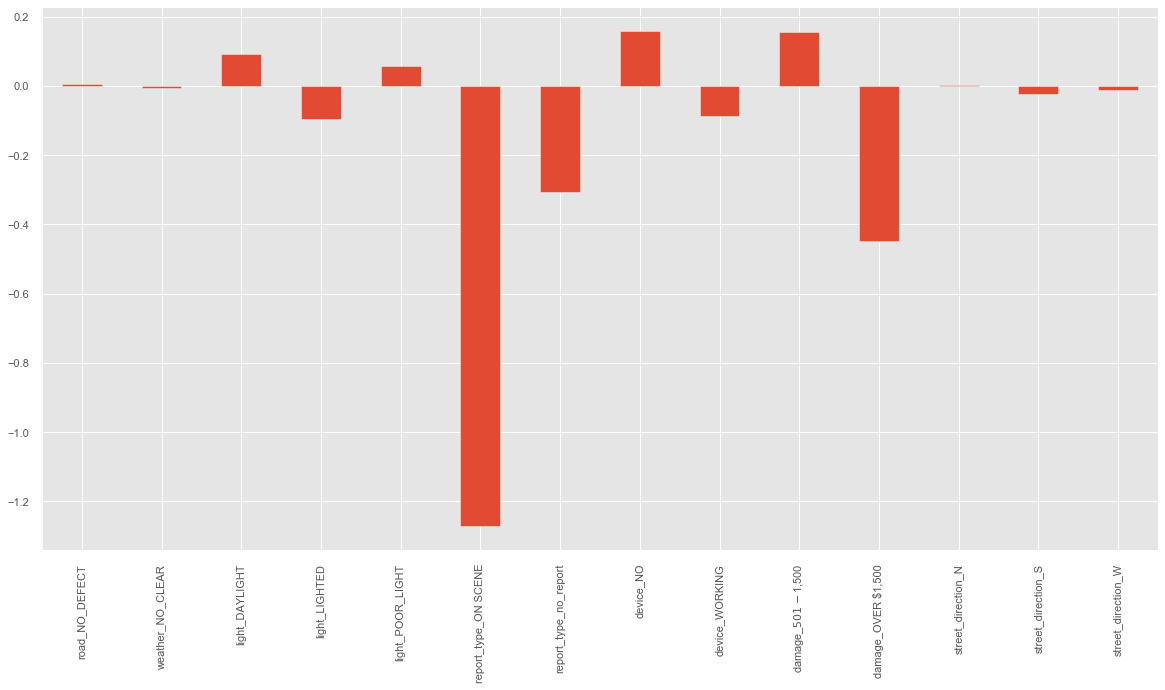

In [207]:
logit_model = LogisticRegression()
logit_model.fit(X_1train, y_train)

print('train_score: ', logit_model.score(X_1train, y_train))
print('Test_score: ', logit_model.score(X_1test, y_test))

y_hat = logit_model.predict(X_1test) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

# report
logit_report = mt.classification_report(y_test, y_hat)            
print(logit_report)

#weight

design_df_1 = design_df.loc[:,['road_NO_DEFECT', 'weather_NO_CLEAR', 'light_DAYLIGHT', 'light_LIGHTED',
                               'light_POOR_LIGHT', 'report_type_ON SCENE', 'report_type_no_report', 'device_NO', 'device_WORKING', 
                                'damage_$501 - $1,500', 'damage_OVER $1,500','street_direction_N', 'street_direction_S', 'street_direction_W']].copy()

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize = (20,10))
weights = pd.Series(logit_model.coef_[0],index=design_df_1.columns)
weights.plot(kind='bar')
plt.show()

In [223]:
from sklearn import svm


# svm_model = svm.SVC(kernel='rbf')

# fitting
svm_model.fit(X_1train, y_train)   

#predict
y_hat = svm_model.predict(X_1test)


svm_matrix = mt.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

#report
svm_report = mt.classification_report(y_test, y_hat)            
print(svm_report)

[[16227  8304]
 [10229 61842]]


              precision    recall  f1-score   support

      INJURY       0.61      0.66      0.64     24531
   NO_INJURY       0.88      0.86      0.87     72071

    accuracy                           0.81     96602
   macro avg       0.75      0.76      0.75     96602
weighted avg       0.81      0.81      0.81     96602



## Tree model

In [224]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

tree_model.fit(X_1train, y_train)

y_hat = tree_model.predict(X_1test)

print(y_hat[0:10])
print(y_test.values[0:10])

['NO_INJURY' 'INJURY' 'INJURY' 'NO_INJURY' 'NO_INJURY' 'NO_INJURY'
 'NO_INJURY' 'INJURY' 'NO_INJURY' 'NO_INJURY']
['NO_INJURY' 'INJURY' 'NO_INJURY' 'NO_INJURY' 'NO_INJURY' 'NO_INJURY'
 'NO_INJURY' 'INJURY' 'INJURY' 'NO_INJURY']


In [225]:
# performance
from sklearn import metrics as mt


acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("accuracy", acc )
print("confusion matrix\n",conf)


tree_report = mt.classification_report(y_test, y_hat)            
print(tree_report)

accuracy 0.8073435332601809
confusion matrix
 [[16494  8037]
 [10574 61497]]
              precision    recall  f1-score   support

      INJURY       0.61      0.67      0.64     24531
   NO_INJURY       0.88      0.85      0.87     72071

    accuracy                           0.81     96602
   macro avg       0.75      0.76      0.75     96602
weighted avg       0.81      0.81      0.81     96602



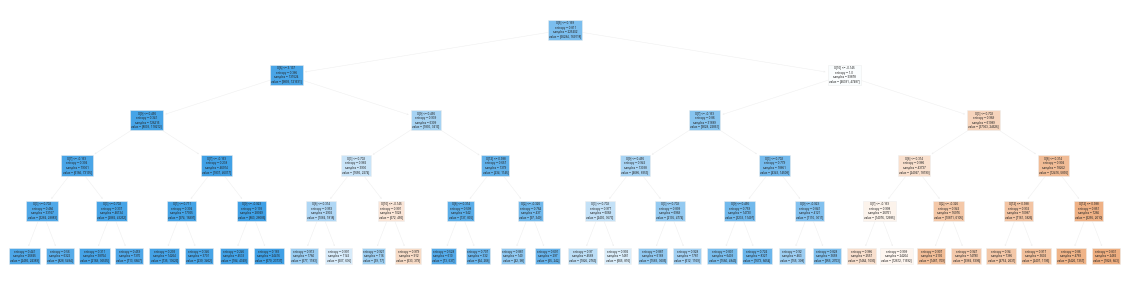

In [228]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize = (20,5))

plot_tree(tree_model, filled=True)
plt.show()

In [229]:
# import graphviz
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
# clf = tree_model.fit(X_1train, y_train)

# dot_data = tree.export_graphviz(clf, out_file=None,
#                                 feature_names=design_df_1.columns,
#                                 class_names=['INJURY','NO_INJURY'], 
#                                 filled=True, rounded=True,
#                                 special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph.render('tree.pdf')
# graph